# Определение стоимости автомобилей

<a href='#part1'>***1. Описание проекта***</a>

<a href='#part2'>***2. Условные обозначения***</a>

<a href='#part3'>***3. Подготовка данных***</a>

<a href='#part4'>***4. Обучение моделей***</a>

<a href='#part5'>***5. Анализ моделей***</a>

<a id='part1'>***1. Описание проекта***</a>

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В нашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Необходимо построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

<a id='part2'>***2. Условные обозначения***</a>

DateCrawled — дата скачивания анкеты из базы

VehicleType — тип автомобильного кузова

RegistrationYear — год регистрации автомобиля

Gearbox — тип коробки передач

Power — мощность (л. с.)

Model — модель автомобиля

Kilometer — пробег (км)

RegistrationMonth — месяц регистрации автомобиля

FuelType — тип топлива

Brand — марка автомобиля

NotRepaired — была машина в ремонте или нет

DateCreated — дата создания анкеты

NumberOfPictures — количество фотографий автомобиля

PostalCode — почтовый индекс владельца анкеты (пользователя)

LastSeen — дата последней активности пользователя

Целевой признак

Price — цена (евро)

<a id='part3'>***3. Подготовка данных***</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from lightgbm import LGBMRegressor
import warnings; warnings.filterwarnings(action='ignore') 

In [2]:
# откроем файл и посмотрим на данные
try:
    df = pd.read_csv('C:/Users/ASUS/Desktop/практикум/модуль 3/спринт 11. Численные методы/autos.csv')
except:
    df = pd.read_csv('/datasets/autos.csv')
    
display(df.head(5))
print('\n\n')
df.info()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), obje

In [3]:
# удалим ненужные столбцы
df = df.drop(['PostalCode', 'DateCrawled', 'DateCreated', 'LastSeen'], axis = 1)

In [4]:
# приведем названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [5]:
# посчитаем пропуски в таблице
df.isna().sum()

price                    0
vehicletype          37490
registrationyear         0
gearbox              19833
power                    0
model                19705
kilometer                0
registrationmonth        0
fueltype             32895
brand                    0
notrepaired          71154
numberofpictures         0
dtype: int64

In [6]:
# заменим пропуски на other 
df.fillna('other', inplace=True)
print(df.isna().sum())

price                0
vehicletype          0
registrationyear     0
gearbox              0
power                0
model                0
kilometer            0
registrationmonth    0
fueltype             0
brand                0
notrepaired          0
numberofpictures     0
dtype: int64


In [7]:
# подсчитаем количество уникальных значений в каждом столбце
for column in df.columns:
    print(df[column].value_counts())
    print('\n\n')

0        10772
500       5670
1500      5394
1000      4649
1200      4594
         ...  
13180        1
10879        1
2683         1
634          1
8188         1
Name: price, Length: 3731, dtype: int64



sedan          91457
small          79831
wagon          65166
other          40778
bus            28775
convertible    20203
coupe          16163
suv            11996
Name: vehicletype, dtype: int64



2000    24490
1999    22728
2005    22109
2001    20124
2006    19900
        ...  
4100        1
1200        1
5300        1
8888        1
2290        1
Name: registrationyear, Length: 151, dtype: int64



manual    268251
auto       66285
other      19833
Name: gearbox, dtype: int64



0        40225
75       24023
60       15897
150      14590
101      13298
         ...  
323          1
3454         1
1056         1
13636        1
1158         1
Name: power, Length: 712, dtype: int64



other                 44126
golf                  29232
3er                   19761
polo     

In [8]:
# посмотрим на данные через метод describe
df.describe()

,price,registrationyear,power,kilometer,registrationmonth,numberofpictures
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0


In [9]:
# посмотрим на корреляцию между столбцами
display(df.corr())

,price,registrationyear,power,kilometer,registrationmonth,numberofpictures
price,1.000000,0.026916,0.158872,-0.333199,0.110581,NaN
registrationyear,0.026916,1.000000,-0.000828,-0.053447,-0.011619,NaN
power,0.158872,-0.000828,1.000000,0.024002,0.043380,NaN
kilometer,-0.333199,-0.053447,0.024002,1.000000,0.009571,NaN
registrationmonth,0.110581,-0.011619,0.043380,0.009571,1.000000,NaN
numberofpictures,NaN,NaN,NaN,NaN,NaN,NaN


### в таблице встречаются артефакты, такие как: цена=0, 0 месяц, мощность двигателя=0 или 20000, год регистрации машины =1000. Существует пустой столбец numberofpictures. Но также встречается other, что идентично пропускам. И такие пропуски встречаются только в текстовых столбцах, поэтому заменим все пропуски в таблице other.

In [10]:
# удалим пустой столбец с фотографиями
df = df.drop(['numberofpictures'], axis = 1)

In [11]:
# удалим строки с 0 ценой, т.к. предсказывать таргет, который не существует 
# бессмысленно
df=df.drop(df.index[df['price']==0])

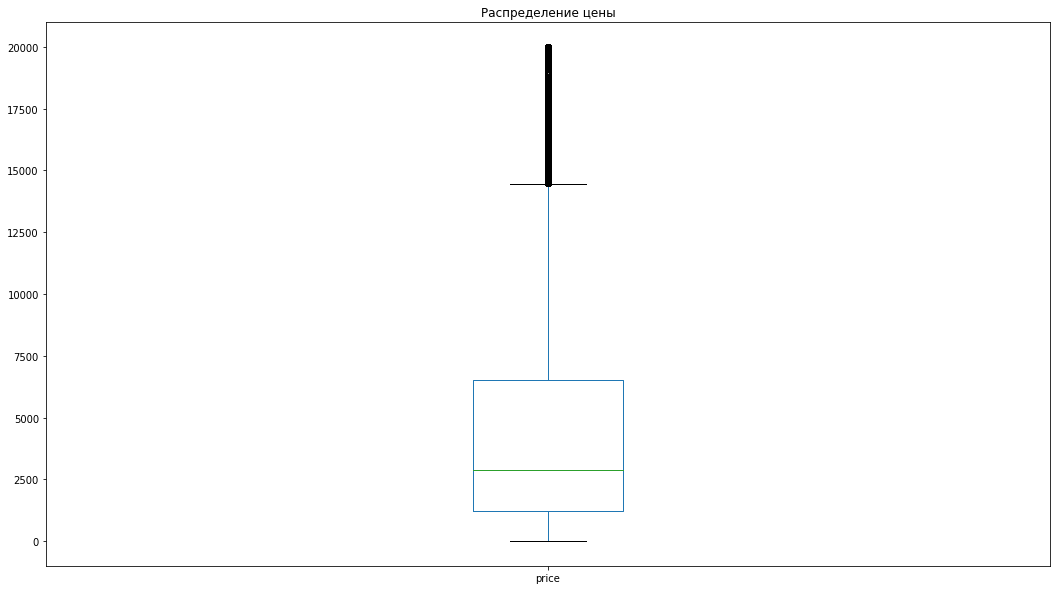

In [12]:
# посмотрим на распределение таргета
df['price'].plot.box(figsize=(18, 10), title='Распределение цены')
plt.show()

In [13]:
# уточним верхнюю границу распределения
df['price'].quantile(0.95)

14800.0

In [14]:
# посчитаем сколько таких авто
print('количество машин:', df[df['price'] > 14800].shape[0])
print('в процентах:', df[df['price'] > 14800].shape[0] / df.shape[0] * 100)

количество машин: 17132
в процентах: 4.9860738015756825


In [15]:
# удалим их
df=df.drop(df.index[df['price'] > 14800])

In [16]:
# найдем 5% квантиль в годе регистрации машин
df['registrationyear'].quantile(0.05)

1993.0

In [17]:
# посчитаем сколько артефактов в годе регистрации машин
print(df[(df['registrationyear']<1993) ^ (df['registrationyear']>2020)].shape[0])

16200


## мы до этого уже удалили 27904 строк с ценой, что составляет 7.8% от всей выборки. Удалив еще 16200 строк мы сократим нашу выборку на 12.4%. Это уже много и это только 2 признака-что будет с другими признаками пока неизвестно. Поэтому попробуем найдем 1% квантиль и посмотрим сколько машин попадет в него, чтобы можно было их безопасно удалить.

In [18]:
print(df['registrationyear'].quantile(0.01))
print(df[(df['registrationyear']<1981) ^ (df['registrationyear']>2020)].shape[0])

1981.0
3273


In [19]:
# теперь машин немного, удалим их
df=df.drop(df.index[(df['registrationyear']<1981) ^ (df['registrationyear']>2020)])

In [20]:
# полагаю, что месяц регистрации не сильно влияет на цену авто. Возможно он 
# сильно коррелирует с ценой на новых машинах. Проверим это предположение.

# выведем самый последний год зарегистрированных машин
print(df['registrationyear'].max())

2019


In [21]:
# посмотрим, сколько всего таких машин
print(df[df['registrationyear']==2019].shape[0])

14


In [22]:
# сохраним эти авто в новую таблицу
new_auto=df[df['registrationyear']==2019]

In [23]:
# посмотрим корреляцию между ценой и месяцем регистрации на новых авто
print(new_auto['registrationmonth'].corr(new_auto['price']))

0.223208757837635


### как и предполагалось и здесь эти значения не сильно взаимосвязаны. Этот столбец тоже удалим.

In [24]:
df = df.drop(['registrationmonth'], axis=1)

In [25]:
# теперь разберемся с мощностью двигателя. 
# посчитаем авто с двигателями мощностью менее 500 и более 50
power = df[(df['power']>50) & (df['power']<500)]
print(power.shape[0])

278615


In [26]:
# посчитаем сколько авто с "неправильной" мощностью
print((df.shape[0] - power.shape[0]) / df.shape[0] *100)

13.792730018069754


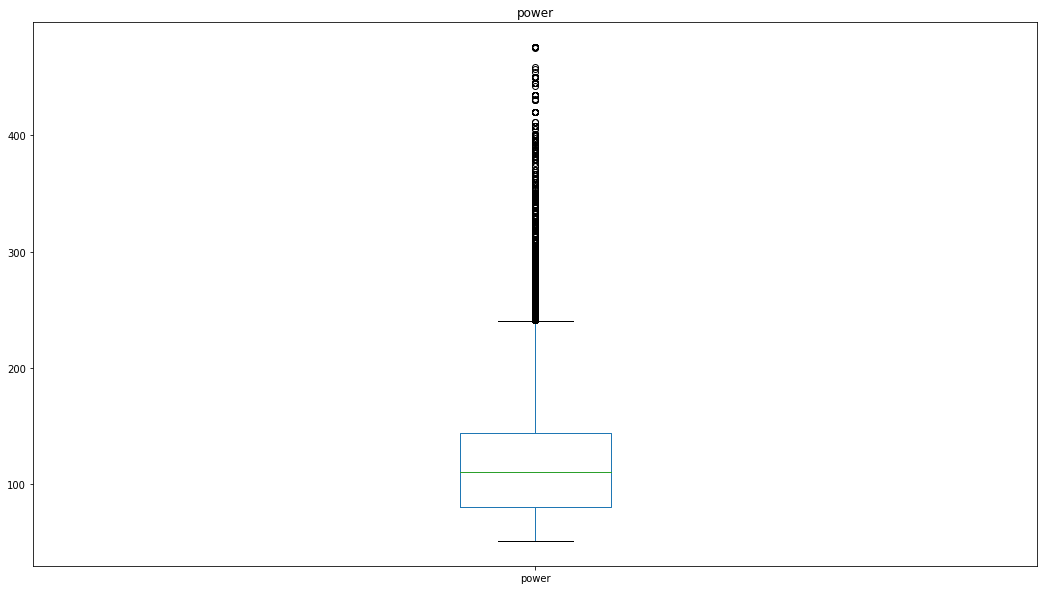

In [27]:
# посмотрим на выбросы в оставшихся авто
power['power'].plot.box(figsize=(18, 10), title='power')
plt.show()

In [28]:
# найдем 99% квантиль
print(power['power'].quantile(0.95))

213.29999999998836


### Автомобилей с артефактами по мощности достаточно много, целых 13.79%. Удалить так много данных было бы жалко, поэтому случайным образом присвоим им мощность от 50 до 95% квантиля, т.е. 213, но в тоже время не будем удалять или каким то иным образом чистить выбросы (которые также имеются), чтобы наши данные не преобрели искусственность.

In [29]:
df.loc[(df['power']<50) ^ (df['power']>500), 'power']=np.random.randint(50, 213)

# проверим замену
print(df['power'].describe())

count    323192.000000
mean        120.934813
std          46.985663
min          50.000000
25%          85.000000
50%         116.000000
75%         141.000000
max         500.000000
Name: power, dtype: float64


<a id='part4'>***4. Обучение моделей***</a>

In [30]:
# переведем категориальные переменные в числовые
cat = ['vehicletype', 'gearbox', 'model', 'fueltype', 'brand', 'notrepaired']

encoder=OrdinalEncoder()
df[cat] = encoder.fit_transform(df[cat])

In [31]:
# масштабируем числовые признаки
numeric = ['registrationyear', 'power', 'kilometer']
scaler = StandardScaler()
scaler.fit(df[numeric])
df[numeric] = scaler.transform(df[numeric])
display(df.head())

,price,vehicletype,registrationyear,gearbox,power,model,kilometer,fueltype,brand,notrepaired
0,480,3.0,-1.589745,1.0,0.427050,116.0,0.544606,6.0,38.0,1.0
2,9800,6.0,0.122904,0.0,0.895278,117.0,-0.159462,2.0,14.0,1.0
3,1500,5.0,-0.344182,1.0,-0.977636,116.0,0.544606,6.0,38.0,0.0
4,3600,5.0,0.745686,1.0,-1.105335,101.0,-1.145158,2.0,31.0,0.0
5,650,4.0,-1.278355,1.0,-0.402992,11.0,0.544606,6.0,2.0,2.0


In [32]:
# выделим признаки и таргет в отдельные переменные
features = df.drop(['price'], axis = 1)
target = df['price']
display(features.head())

,vehicletype,registrationyear,gearbox,power,model,kilometer,fueltype,brand,notrepaired
0,3.0,-1.589745,1.0,0.427050,116.0,0.544606,6.0,38.0,1.0
2,6.0,0.122904,0.0,0.895278,117.0,-0.159462,2.0,14.0,1.0
3,5.0,-0.344182,1.0,-0.977636,116.0,0.544606,6.0,38.0,0.0
4,5.0,0.745686,1.0,-1.105335,101.0,-1.145158,2.0,31.0,0.0
5,4.0,-1.278355,1.0,-0.402992,11.0,0.544606,6.0,2.0,2.0


In [33]:
# разделим выборки на обучающую и валидационную
features_train, features_valid, target_train, target_valid = train_test_split(
                        features, target, test_size=0.4, random_state=1)

features_valid, features_test, target_valid, target_test = train_test_split(
                        features_valid, target_valid, test_size=0.5, random_state=1)


In [34]:
# проверим размерность полученных датасетов
print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)
print(features_test.shape)
print(target_test.shape)

(193915, 9)
(193915,)
(64638, 9)
(64638,)
(64639, 9)
(64639,)


In [35]:

%%time
# исследуем модель дерева
tree_rmse = 10000
tree_depth = 0
for t_depth in range(1, 20):
    tree = DecisionTreeRegressor(random_state=1, max_depth=t_depth)
    tree.fit(features_train, target_train)
    predictions_valid = tree.predict(features_valid)
    result = (mean_squared_error(target_valid, predictions_valid))**0.5
    
    if result < tree_rmse:
        tree_rmse = result
        tree_depth = t_depth
    
print("Глубина дерева", tree_depth, ',', "rmse:", round(tree_rmse))


Глубина дерева 15 , rmse: 1600
Wall time: 7.88 s


,importance
registrationyear,0.506280
power,0.239308
kilometer,0.077572
brand,0.048395
model,0.042207
vehicletype,0.035805
notrepaired,0.023080
gearbox,0.014215
fueltype,0.013135


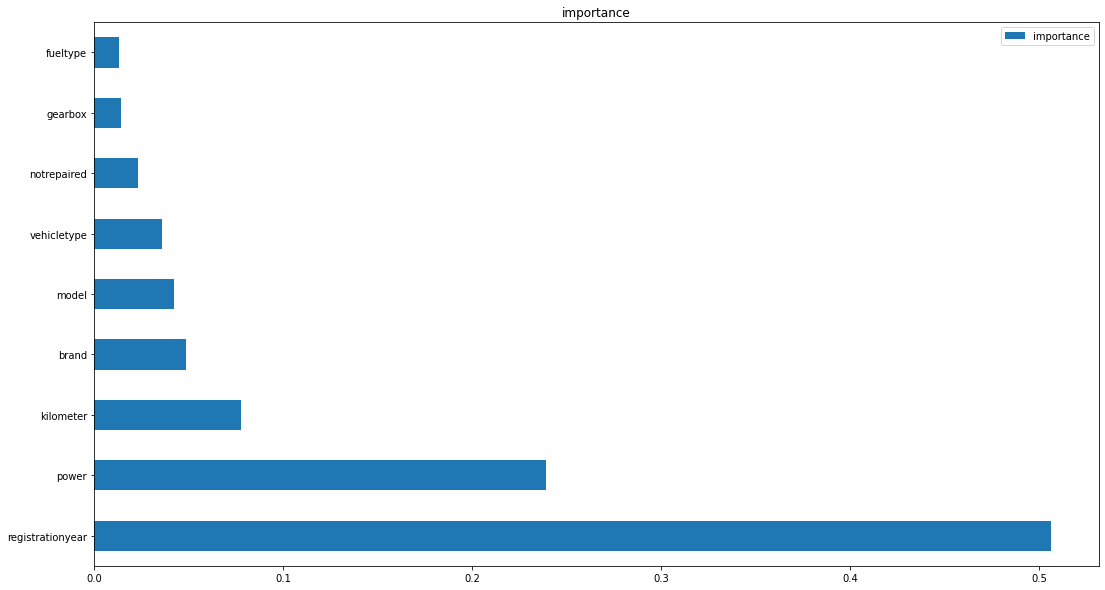

In [36]:

# выведем важность признаков в модели
feature_importances=(pd.DataFrame(tree.feature_importances_,
                    index=features_valid.columns, columns=["importance"])
                     .sort_values(by='importance', ascending=False))
display(feature_importances)
feature_importances.plot(kind='barh', figsize=(18, 10))
plt.title('importance')
plt.show()


In [37]:

%%time
# подбирем оптимальную глубину леса при небольшом кол-ве деревьев
forest_depth = 0
forest_rmse = 10000

for n in range(1, 25, 1):
    forest = RandomForestRegressor(n_estimators=20,
                                   max_depth=n,
                                   random_state=1,
                                   n_jobs=4)
    forest.fit(features_train, target_train)
    predictions_valid = forest.predict(features_valid)
    result = (mean_squared_error(target_valid, predictions_valid))**0.5
    
    if result < forest_rmse:
        forest_rmse = result
        forest_depth = n
print("Глубина дерева", forest_depth, ',', "rmse:", round(forest_rmse))


Глубина дерева 19 , rmse: 1391
Wall time: 1min 16s


In [38]:

%%time
# исследуем модель случайного леса    
for_rmse = 10000
estimators = 0

for i in range(1, 150, 10):
    forest = RandomForestRegressor(random_state=1, 
                                   n_estimators=i, 
                                   max_depth=forest_depth, 
                                   n_jobs=-1)
    forest.fit(features_train, target_train)
    predictions_valid = forest.predict(features_valid)
    result = (mean_squared_error(target_valid, predictions_valid))**0.5
    
    if result < for_rmse:
        for_rmse = result
        estimators = i
print("Количество деревьев", estimators, ',', "rmse:", round(for_rmse))


Количество деревьев 131 , rmse: 1375
Wall time: 3min 2s


,importance
registrationyear,0.533260
power,0.231379
kilometer,0.053354
brand,0.050356
model,0.043045
vehicletype,0.036207
notrepaired,0.024362
gearbox,0.014414
fueltype,0.013622


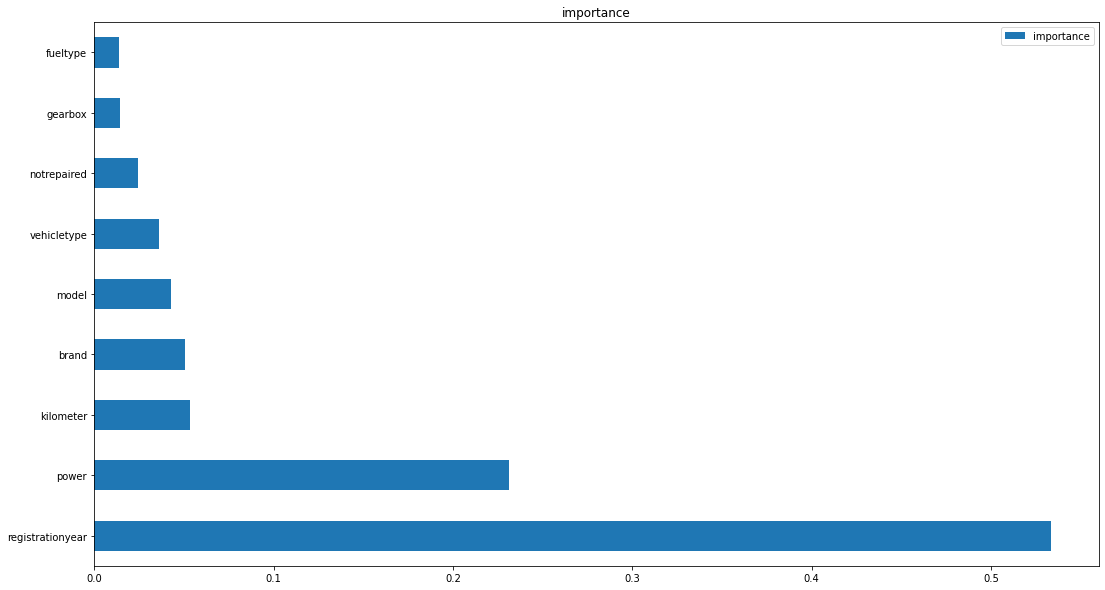

In [39]:

# выведем важность признаков в модели
feature_importances=(pd.DataFrame(forest.feature_importances_,
                    index=features_valid.columns, columns=["importance"])
                     .sort_values(by='importance', ascending=False))
display(feature_importances)
feature_importances.plot(kind='barh', figsize=(18, 10))
plt.title('importance')
plt.show()


In [40]:
%%time
# исследуем модель линейной регрессии
regression = LinearRegression()
regression.fit(features_train, target_train)
predictions_valid = regression.predict(features_valid)
regression_rmse = (mean_squared_error(predictions_valid, target_valid))**0.5
print(round(regression_rmse))


2510
Wall time: 67.1 ms


In [41]:
%%time
# исследуем модель с базовой моделью решающего дерева
cat = ['vehicletype', 'gearbox', 'model', 'fueltype', 'brand', 'notrepaired']
gbm = lgb.LGBMRegressor(objective = 'regression', 
                        boosting_type = 'gbdt',
                        num_leaves = 31, 
                        learning_rate = 0.5,
                        max_depth = -1,
                        n_estimators = 150)

gbm.fit(features_train, 
        target_train,
        eval_set = [(features_valid, target_valid)],
        eval_metric ='rmse',
        early_stopping_rounds = 5,
        verbose = 10,
        categorical_feature = cat)

predictions_valid = gbm.predict(features_valid)

Training until validation scores don't improve for 5 rounds
[10]	valid_0's rmse: 1498.5	valid_0's l2: 2.24551e+06
[20]	valid_0's rmse: 1442.88	valid_0's l2: 2.08189e+06
[30]	valid_0's rmse: 1417.56	valid_0's l2: 2.00948e+06
[40]	valid_0's rmse: 1406.59	valid_0's l2: 1.97849e+06
[50]	valid_0's rmse: 1396.06	valid_0's l2: 1.94899e+06
[60]	valid_0's rmse: 1390.33	valid_0's l2: 1.93301e+06
[70]	valid_0's rmse: 1388.5	valid_0's l2: 1.92794e+06
[80]	valid_0's rmse: 1384.29	valid_0's l2: 1.91627e+06
[90]	valid_0's rmse: 1381.41	valid_0's l2: 1.9083e+06
[100]	valid_0's rmse: 1378.66	valid_0's l2: 1.9007e+06
[110]	valid_0's rmse: 1375.4	valid_0's l2: 1.89172e+06
[120]	valid_0's rmse: 1374.37	valid_0's l2: 1.8889e+06
[130]	valid_0's rmse: 1373.6	valid_0's l2: 1.88676e+06
Early stopping, best iteration is:
[125]	valid_0's rmse: 1373.37	valid_0's l2: 1.88614e+06
Wall time: 1.07 s


,importance
power,953
registrationyear,867
model,676
kilometer,409
brand,246
vehicletype,206
notrepaired,176
gearbox,153
fueltype,64


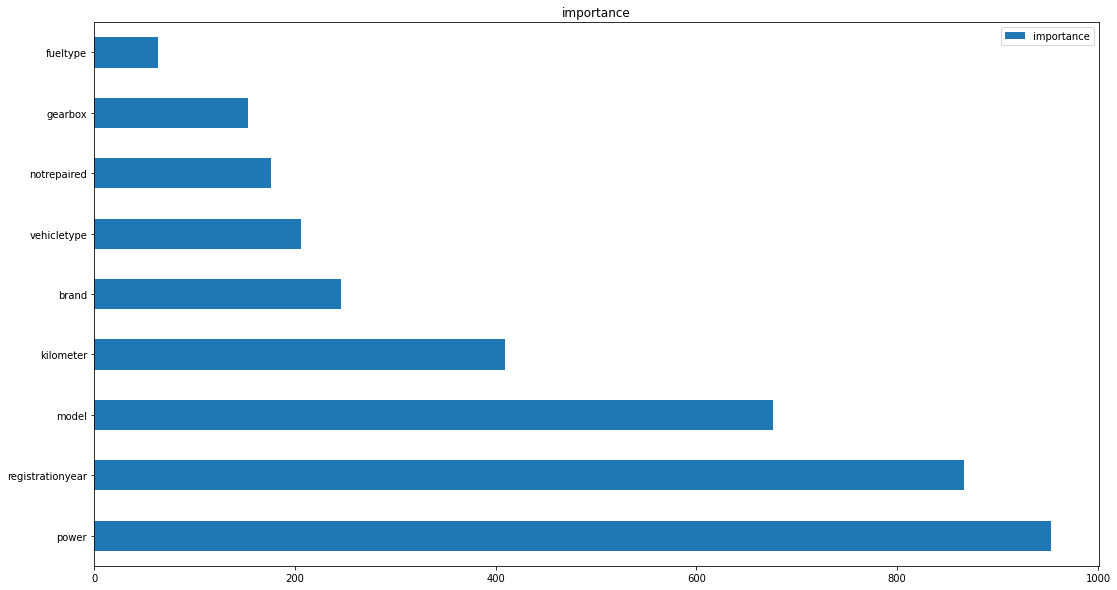

In [42]:
feature_importances=pd.DataFrame(gbm.feature_importances_, index=features_valid.columns, columns=["importance"]).sort_values(by='importance', ascending=False)
display(feature_importances)
feature_importances.plot(kind='barh', figsize=(18, 10))
plt.title('importance')
plt.show()

In [43]:
%%time
# исследуем модель с базовой моделью случайного леса
cat = ['vehicletype', 'gearbox', 'model', 'fueltype', 'brand', 'notrepaired']
gbm = lgb.LGBMRegressor(boosting_type = 'rf',
                        objective = 'regression', 
                        num_leaves = 31, 
                        learning_rate = 0.5,
                        max_depth = -1,
                        n_estimators = 150, 
                        feature_fraction = 0.5,
                        bagging_fraction = 0.5,
                        bagging_freq = 5)

gbm.fit(features_train, 
        target_train,
        eval_set = [(features_valid, target_valid)],
        eval_metric ='rmse',
        early_stopping_rounds = 5,
        verbose = 5,
        categorical_feature = cat)

predictions_valid = gbm.predict(features_valid)

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Training until validation scores don't improve for 5 rounds
[5]	valid_0's rmse: 1898.45	valid_0's l2: 3.60411e+06
[10]	valid_0's rmse: 1826.94	valid_0's l2: 3.33772e+06
[15]	valid_0's rmse: 1881.95	valid_0's l2: 3.54172e+06
Early stopping, best iteration is:
[11]	valid_0's rmse: 1811.63	valid_0's l2: 3.282e+06
Wall time: 400 ms


,importance
registrationyear,111
power,61
model,40
kilometer,30
brand,28
vehicletype,24
notrepaired,16
gearbox,13
fueltype,7


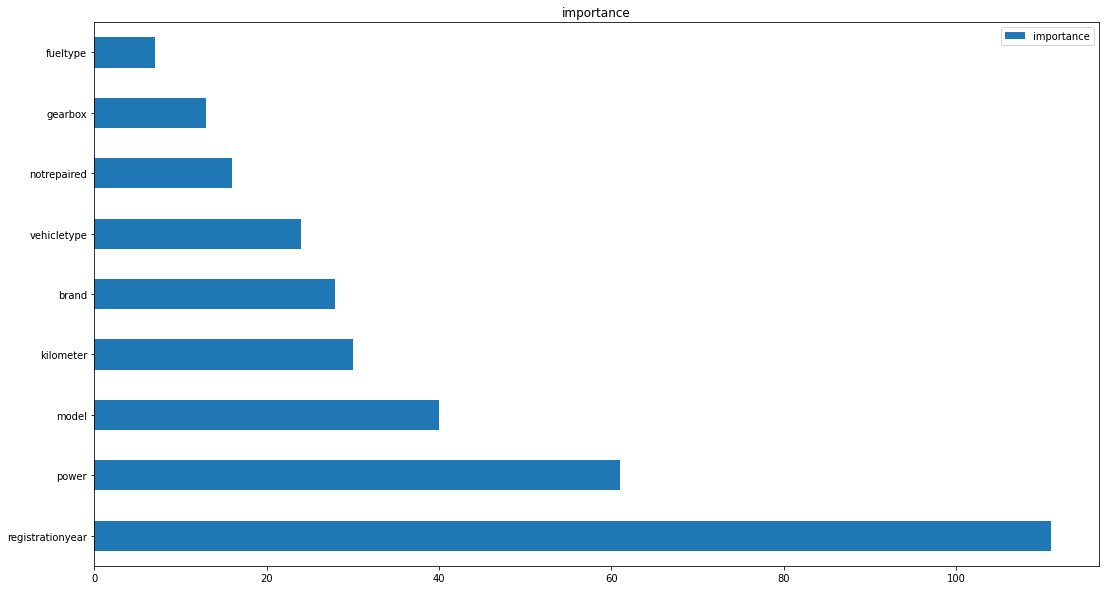

In [44]:
feature_importances=pd.DataFrame(gbm.feature_importances_, index=features_valid.columns, columns=["importance"]).sort_values(by='importance', ascending=False)
display(feature_importances)
feature_importances.plot(kind='barh', figsize=(18, 10))
plt.title('importance')
plt.show()

In [45]:
%%time
# используем бустинг с базовой моделью дерева
cat = ['vehicletype', 'gearbox', 'model', 'fueltype', 'brand', 'notrepaired']
gbm = lgb.LGBMRegressor(objective = 'regression', 
                        num_leaves = 31, 
                        learning_rate = 0.5,
                        max_depth = -1,
                        n_estimators = 150)

gbm.fit(features_train, 
        target_train,
        eval_set = [(features_test, target_test)],
        eval_metric ='rmse',
        early_stopping_rounds = 5,
        verbose = 10,
        categorical_feature = cat)

predictions_valid = gbm.predict(features_valid)


Training until validation scores don't improve for 5 rounds
[10]	valid_0's rmse: 1488.79	valid_0's l2: 2.21649e+06
[20]	valid_0's rmse: 1432.08	valid_0's l2: 2.05085e+06
[30]	valid_0's rmse: 1407.58	valid_0's l2: 1.98128e+06
[40]	valid_0's rmse: 1397.18	valid_0's l2: 1.95211e+06
[50]	valid_0's rmse: 1387.99	valid_0's l2: 1.9265e+06
[60]	valid_0's rmse: 1383.92	valid_0's l2: 1.91525e+06
[70]	valid_0's rmse: 1380.66	valid_0's l2: 1.90622e+06
[80]	valid_0's rmse: 1375.32	valid_0's l2: 1.89152e+06
[90]	valid_0's rmse: 1373.16	valid_0's l2: 1.88557e+06
[100]	valid_0's rmse: 1370.5	valid_0's l2: 1.87827e+06
[110]	valid_0's rmse: 1367.75	valid_0's l2: 1.87074e+06
[120]	valid_0's rmse: 1367.2	valid_0's l2: 1.86922e+06
[130]	valid_0's rmse: 1366.02	valid_0's l2: 1.86602e+06
[140]	valid_0's rmse: 1364.43	valid_0's l2: 1.86167e+06
[150]	valid_0's rmse: 1362.59	valid_0's l2: 1.85665e+06
Did not meet early stopping. Best iteration is:
[150]	valid_0's rmse: 1362.59	valid_0's l2: 1.85665e+06
Wall tim

<a id='part5'>***5. Анализ моделей***</a>

### Наилучшая модель оказалась модель случайного леса с метрикой 1381 и временем работы 2.49 минуты. Однако, учитывая важность для заказчика время работы модели, случайный лес не проходит по требованиям. Модель lightGBM с решающим деревом в основе показала схожий результат в 1378 за значительно более короткое время работы, всего 789 мс.  Проверка этой модели на тестовой выборке показала похожие результаты по качеству и по скорости. Именно эту модель и следует рекомендовать заказчику. Также хотелось бы отметить, что на классических моделях по важности признаков опережающее воздействие (около 0.6) имеет год производства автомобиля, почти втрое превышая важность следующего признака-мощность двигателя (около 0.2). Остальные признаки малозначимы. А на моделях градиентного спуска ситуация уже другая: 1 место по важности по-прежнему занимает год производства, чуть отстает от него мощность, затем уже идет модель.